In [1]:
import torch

from sbi import analysis as analysis
from sbi import utils as utils
from sbi.inference.base import infer
import matplotlib.pyplot as plt
from typing import Any, Dict, List, Optional, Tuple, Union
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from scipy.stats import binom, gaussian_kde
#from sbi.analysis.plot import _update, prepare_for_plot,_arrange_plots, probs2contours, get_diag_func, ensure_numpy,_format_axis
import matplotlib as mpl
from logging import warn
from sbi.analysis import pairplot, marginal_plot

In [2]:
from toy_posterior_for_07_cc import ExamplePosterior

posterior = ExamplePosterior()

In [3]:
x_o = torch.ones(1, 20)  # simulator output was 20-dimensional
posterior.set_default_x(x_o)

In [4]:
posterior_samples = posterior.sample((200,))

posterior_samples.shape

torch.Size([203, 3])

In [9]:
def _get_default_fig_kwargs():
    return {
        "legend":None,
        "legend_kwargs": {},
        # labels
        "points_labels": [f"points_{idx}" for idx in range(10)],  # for points
        "samples_labels": [f"samples_{idx}" for idx in range(10)],  # for samples
        # colors: take even colors for samples, odd colors for points
        "samples_colors": plt.rcParams["axes.prop_cycle"].by_key()["color"][0::2],
        "points_colors": plt.rcParams["axes.prop_cycle"].by_key()["color"][1::2],
        # ticks
        "tickformatter": mpl.ticker.FormatStrFormatter("%g"),  # type: ignore
        "tick_labels": None,
         # formatting points (scale, markers)
        "points_diag": {},
        "points_offdiag": {
            "marker": ".",
            "markersize": 10,
        },
        # other options
        "fig_bg_colors": {"offdiag": None, "diag": None, "lower": None},
        "fig_subplots_adjust": {
            "top": 0.9,
        },
        "subplots": {},
        "despine": {
            "offset": 0,
        },
        "title":None,
        "title_format": {"fontsize": 16},
}


DEPRECATION WARNING: TODO describe
(101,)
(107,)
(101,)
(107,)
(101,)
(107,)


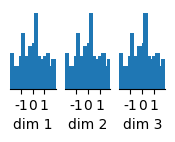

In [10]:
posterior_samples = posterior.sample((100,))
posterior_samples2 = posterior.sample((100,))
fig_kwargs = _get_default_fig_kwargs()
fig, ax = marginal_plot(diag ='hist', samples=[posterior_samples,posterior_samples2],
            diag_kwargs={'mpl_kwargs':{"bins":10,
                                        "alpha":1,
                                        "color":'tab:blue'},
                        },

            fig_kwargs = fig_kwargs,
             figsize=(2,1))

In [ ]:
marginal_plot(diag ='kde', samples=[posterior_samples,posterior_samples2],
            diag_kwargs={'bins': 20,
                         'bw_method':'scott',
                          'mpl_kwargs':{
                                        "alpha":1,
                                        "color":'tab:blue'},

            },            fig = fig,
            ax = ax,
             figsize=(2,1))

In [ ]:
marginal_plot(diag ='scatter', samples=[posterior_samples,posterior_samples2],
            diag_kwargs={
                          'mpl_kwargs':{"lw":0.01,
                                        "alpha":1,
                                        "color":'tab:blue'}
            },
             figsize=(2,1))